# Null counts

## pickup_latitude nulls

In [81]:
%%bq query -n null_lats
select count(*) from `bigquery-public-data.chicago_taxi_trips.taxi_trips` where pickup_latitude is null

In [82]:
%%bq execute -q null_lats

f0_
22541114


## pickup_longitude nulls

In [83]:
%%bq query -n null_longs
select count(*) from `bigquery-public-data.chicago_taxi_trips.taxi_trips` where pickup_longitude is null

In [84]:
%%bq execute -q null_longs

f0_
22541114


## Count of filtered null rows

In [85]:
%%bq query -n filtered_count
select count(*) from `bigquery-public-data.chicago_taxi_trips.taxi_trips` where pickup_latitude is not null and pickup_longitude is not null

In [86]:
%%bq execute -q filtered_count

f0_
164460891


# Payment types and instance counts

In [93]:
%%bq query -n ptypes
select payment_type, count(payment_type) as count from `bigquery-public-data.chicago_taxi_trips.taxi_trips` group by payment_type order by count desc

In [94]:
%%bq execute -q ptypes

payment_type,count
Cash,109424997
Credit Card,75748711
No Charge,803359
Unknown,390652
Mobile,294219
Prcard,222211
Dispute,75927
Pcard,36874
Split,3442
Prepaid,1471


# Statistical exploration

In [87]:
import google.datalab.bigquery as bq
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg
import statsmodels.graphics.plot_grids as scp

In [88]:
query = """
SELECT
  UNIX_SECONDS(trip_start_timestamp) as trip_start,
  EXTRACT(DAYOFWEEK
  FROM
    trip_start_timestamp) AS dayofweek,
  EXTRACT(month
  FROM
    trip_start_timestamp) AS month,
  EXTRACT(year
  FROM
    trip_start_timestamp) AS year,
  pickup_latitude,
  pickup_longitude,
  CASE
    WHEN payment_type="Cash" THEN 1
  ELSE
  0
END
  AS is_cash,
  CASE
    WHEN payment_type="Credit" THEN 1
    WHEN payment_type="Mobile" THEN 1
    WHEN payment_type="Dispute" THEN 1
  ELSE
  0
END
  AS is_credit
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE
  pickup_latitude IS NOT NULL
  AND pickup_longitude IS NOT NULL
  AND payment_type IS NOT NULL
  AND trip_start_timestamp IS NOT NULL
"""
df = bq.Query(query).execute().result().to_dataframe(max_rows=2000000)
df

,trip_start,dayofweek,month,year,pickup_latitude,pickup_longitude,is_cash,is_credit
0,1488438000,5,3,2017,41.975171,-87.687516,1,0
1,1490414400,7,3,2017,41.975171,-87.687516,0,0
2,1483728300,6,1,2017,41.975171,-87.687516,1,0
3,1490168700,4,3,2017,41.975171,-87.687516,0,0
4,1490053500,2,3,2017,41.975171,-87.687516,1,0
5,1490632200,2,3,2017,41.975171,-87.687516,0,0
6,1483422300,3,1,2017,41.975171,-87.687516,1,0
7,1484897400,6,1,2017,41.975171,-87.687516,1,0
8,1488994200,4,3,2017,41.975171,-87.687516,1,0
9,1484385300,7,1,2017,41.975171,-87.687516,1,0


In [89]:
coorel_matrix = np.corrcoef(df, rowvar=False)
coorel_matrix

array([[ 1.        , -0.02532471,  0.05127791,  0.98812005, -0.03498336,
        -0.06711562, -0.15766236,  0.05580233],
       [-0.02532471,  1.        , -0.00999642, -0.02369084, -0.02104595,
         0.06753168,  0.02621907, -0.00123953],
       [ 0.05127791, -0.00999642,  1.        , -0.10224718, -0.00622721,
         0.00179716, -0.00196998, -0.00274798],
       [ 0.98812005, -0.02369084, -0.10224718,  1.        , -0.03387357,
        -0.06711122, -0.15675008,  0.05598661],
       [-0.03498336, -0.02104595, -0.00622721, -0.03387357,  1.        ,
        -0.62473715, -0.02680534,  0.00212939],
       [-0.06711562,  0.06753168,  0.00179716, -0.06711122, -0.62473715,
         1.        ,  0.14086656, -0.00984899],
       [-0.15766236,  0.02621907, -0.00196998, -0.15675008, -0.02680534,
         0.14086656,  1.        , -0.05661567],
       [ 0.05580233, -0.00123953, -0.00274798,  0.05598661,  0.00212939,
        -0.00984899, -0.05661567,  1.        ]])

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


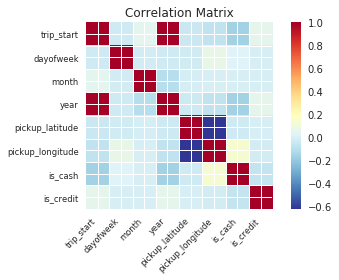

In [90]:
fig = smg.plot_corr(coorel_matrix, xnames=df.columns)
fig.figsize=(12,12)
plt.show() 

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


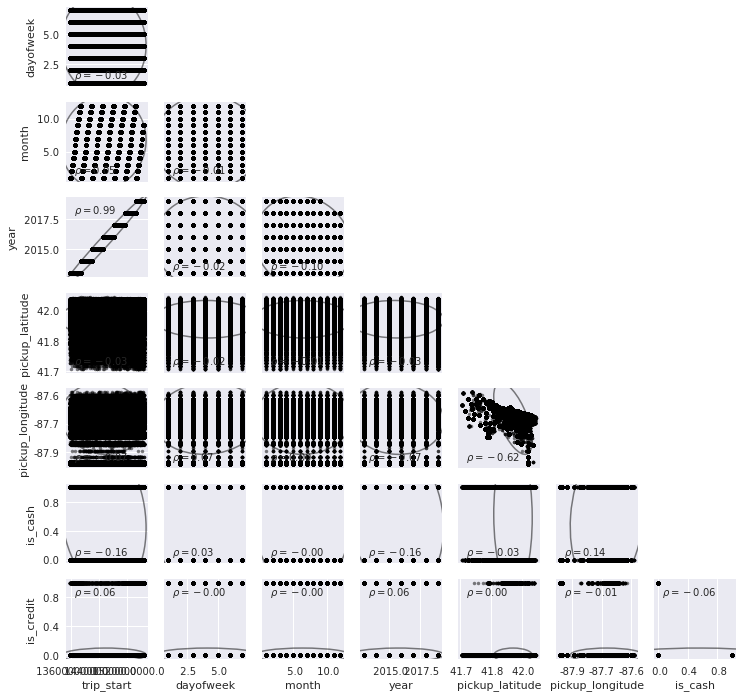

In [91]:
fig = plt.figure(figsize=(12,12))
scp.scatter_ellipse(df, varnames=df.columns, fig=fig)
plt.show() 